In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

Mounted at /content/drive


# Preprocessing

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/digital_marketing_campaign_dataset.csv')

In [3]:
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


In [4]:
# drop customer ID
df.drop(['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool'], inplace = True, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8000 non-null   int64  
 1   Gender             8000 non-null   object 
 2   Income             8000 non-null   int64  
 3   CampaignChannel    8000 non-null   object 
 4   CampaignType       8000 non-null   object 
 5   AdSpend            8000 non-null   float64
 6   ClickThroughRate   8000 non-null   float64
 7   ConversionRate     8000 non-null   float64
 8   WebsiteVisits      8000 non-null   int64  
 9   PagesPerVisit      8000 non-null   float64
 10  TimeOnSite         8000 non-null   float64
 11  SocialShares       8000 non-null   int64  
 12  EmailOpens         8000 non-null   int64  
 13  EmailClicks        8000 non-null   int64  
 14  PreviousPurchases  8000 non-null   int64  
 15  LoyaltyPoints      8000 non-null   int64  
 16  Conversion         8000 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000
EmailOpens,8000.0,9.476875,5.711111,0.000000,5.000000,9.000000,14.000000,19.000000


In [8]:
# prompt: Sử dụng thống kê mô tả cho các biến số như Age, Income, AdSpend, TimeOnSite để hiểu thêm về sự phân phối dữ liệu.

# Display descriptive statistics for numerical features
numerical_features = ['Age', 'Income', 'AdSpend', 'TimeOnSite']
print(df[numerical_features].describe())

               Age         Income      AdSpend   TimeOnSite
count  8000.000000    8000.000000  8000.000000  8000.000000
mean     43.625500   84664.196750  5000.944830     7.727718
std      14.902785   37580.387945  2838.038153     4.228218
min      18.000000   20014.000000   100.054813     0.501669
25%      31.000000   51744.500000  2523.221165     4.068340
50%      43.000000   84926.500000  5013.440044     7.682956
75%      56.000000  116815.750000  7407.989369    11.481468
max      69.000000  149986.000000  9997.914781    14.995311


In [ ]:
y = df['Conversion']
print(df['Conversion'].value_counts())
X = df.drop('Conversion', axis = 1)

Conversion
1    7012
0     988
Name: count, dtype: int64


number of numeric field:  14


<ipython-input-8-ba66c751d389>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
<ipython-input-8-ba66c751d389>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
<ipython-input-8-ba66c751d389>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0

Error EmailOpens


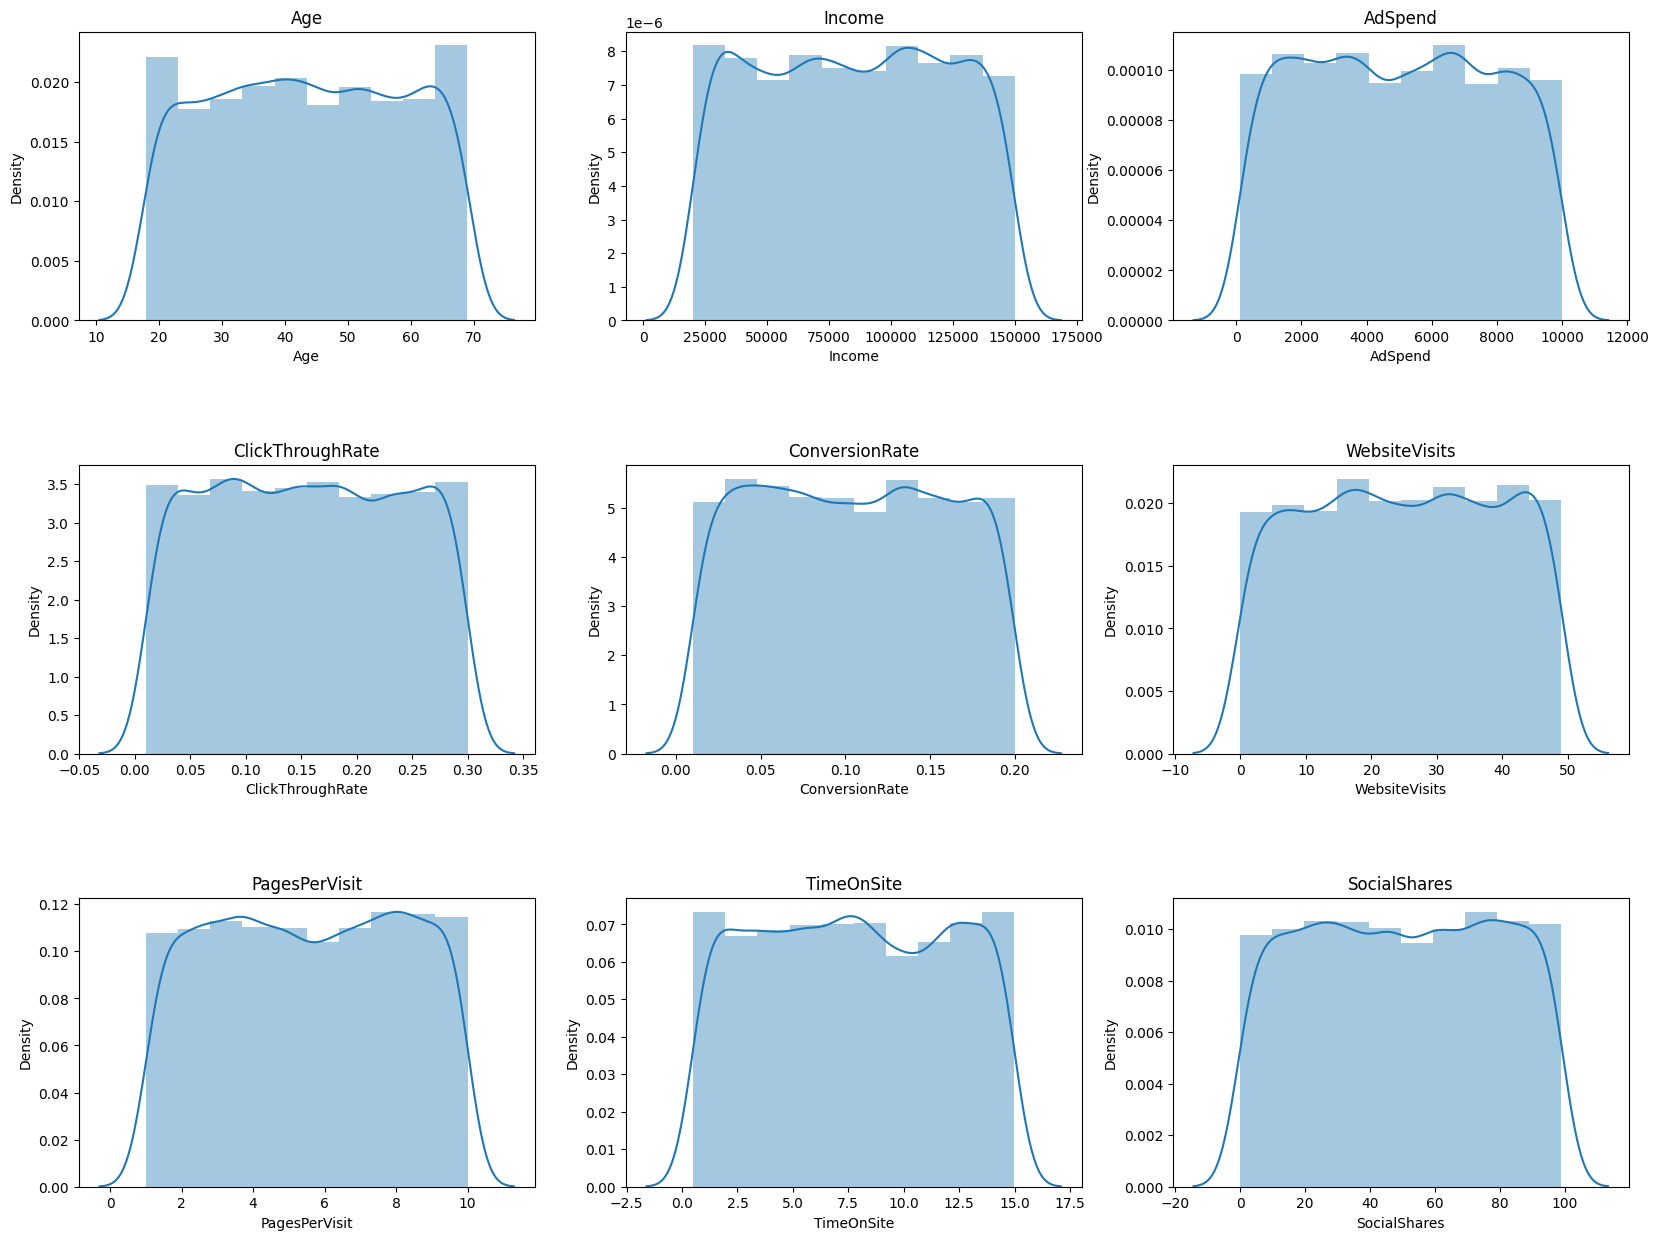

In [ ]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

numeric_cols = df.select_dtypes(include=['float','int']).columns

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(df, numeric_cols, row=3, col=3, figsize=(20, 15), bins = 10):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    print('number of numeric field: ', len(numeric_cols))
    assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

_distribution_numeric(df, numeric_cols)

number of category field:  3


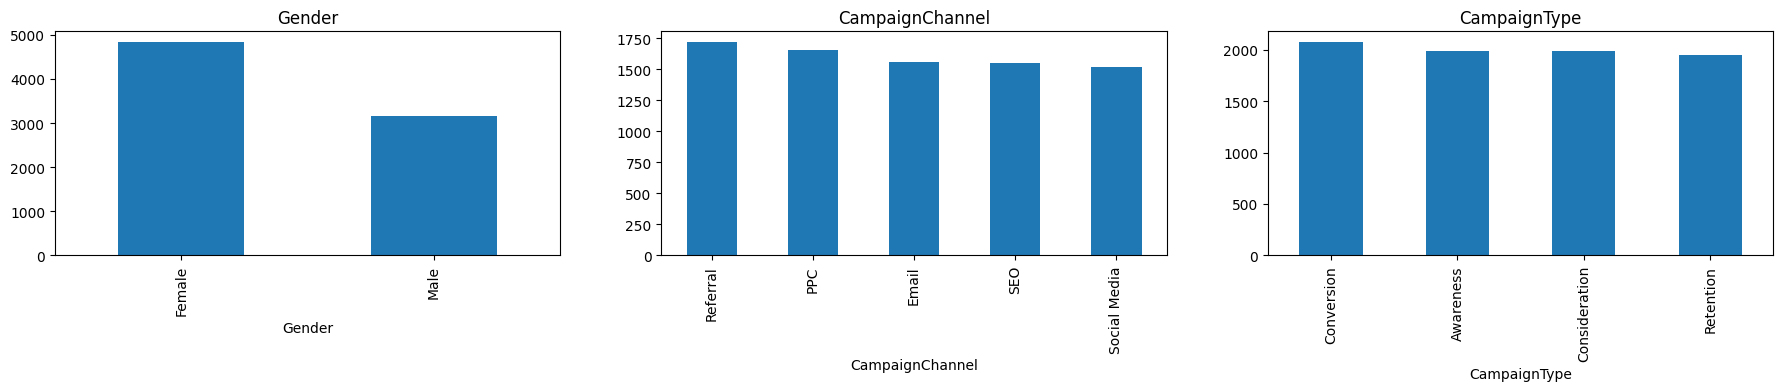

In [ ]:
# Đối với biến phân loại
cate_cols = df.select_dtypes('O').columns

def _plot_bar_classes(df, cols):
    df[cols].value_counts().plot.bar()

def _distribution_cate(df, cate_cols, row = 1, col = 2, figsize = (20, 5)):
  '''
  cate_cols: list các tên cột
  row: số lượng dòng trong lưới đồ thị
  col: số lượng cột trong lưới đồ thị
  figsize: kích thước biểu đồ
  '''
  print('number of category field: ', len(cate_cols))
  plt.figure(figsize = figsize)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
  for i in range(1, len(cate_cols)+1, 1):
    try:
      plt.subplot(row, col, i)
      _plot_bar_classes(df, cate_cols[i-1])
      plt.title(cate_cols[i-1])
    except:
      break

_distribution_cate(df, cate_cols, row = 4, col = 4, figsize = (30, 16))

In [ ]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Select only numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns  # Fix here

# Apply MinMaxScaler to the numerical columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [ ]:
X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [ ]:
encoder = OrdinalEncoder(categories=[['Awareness','Consideration', 'Conversion',  'Retention']])

# Reshape the input to 2D and encode the column
X['CampaignType'] = encoder.fit_transform(X[['CampaignType']])  # Note the double brackets

In [ ]:
X

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,0.745098,1,0.899409,Social Media,0.0,0.646384,0.116958,0.410648,0.000000,0.155422,0.475735,0.191919,0.315789,1.000000,0.444444,0.137628
1,1.000000,0,0.167313,Email,3.0,0.383781,0.502547,0.909094,0.857143,0.213000,0.334690,0.050505,0.105263,0.777778,0.222222,0.691938
2,0.549020,1,0.526590,PPC,0.0,0.146130,0.922480,0.349542,0.040816,0.802699,0.917177,0.000000,0.578947,0.222222,0.888889,0.467493
3,0.274510,1,0.185201,PPC,2.0,0.044401,0.440078,0.410505,0.959184,0.393450,0.978822,0.898990,0.105263,0.222222,0.000000,0.492699
4,0.823529,1,0.492029,PPC,2.0,0.159427,0.837507,0.525971,0.000000,0.116287,0.930870,0.060606,0.315789,0.666667,0.888889,0.869174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.058824,0,0.037200,Email,0.0,0.850513,0.806264,0.561936,0.469388,0.966056,0.947045,0.707071,0.684211,0.666667,0.777778,0.057211
7996,0.490196,1,0.190072,SEO,3.0,0.133823,0.781946,0.947711,1.000000,0.944431,0.206948,0.525253,0.684211,0.111111,0.555556,0.300460
7997,0.196078,1,0.811382,Referral,1.0,0.455601,0.160438,0.651702,0.714286,0.205899,0.973989,0.383838,0.842105,0.000000,0.333333,0.147630
7998,0.019608,1,0.675899,PPC,1.0,0.947281,0.048132,0.675705,1.000000,0.000282,0.232858,0.868687,0.052632,0.555556,0.777778,0.541908


In [ ]:
cat_names = list(df.select_dtypes('object').columns)
num_names = list(df.select_dtypes(['float', 'int']).columns)
print(cat_names)
print(num_names)

['Gender', 'CampaignChannel', 'CampaignType']
['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']


In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, shuffle = True, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6400, 20) (6400,)
(1600, 20) (1600,)


In [ ]:
clf = DecisionTreeClassifier(criterion='gini',random_state = 42,class_weight = 'balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.32      0.34      0.33       189
           1       0.91      0.91      0.91      1411

    accuracy                           0.84      1600
   macro avg       0.62      0.62      0.62      1600
weighted avg       0.84      0.84      0.84      1600



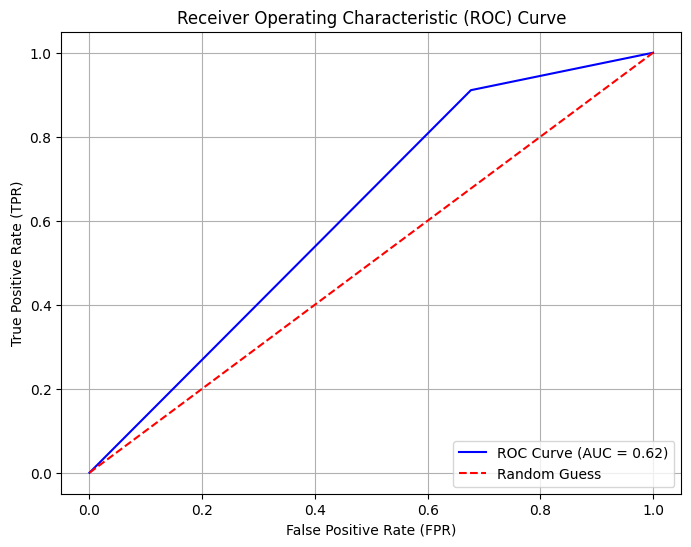

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Pre Pruning

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
tree = DecisionTreeClassifier(criterion='gini',random_state = 42,class_weight = 'balanced',max_depth= 9, min_samples_leaf=4,min_samples_split= 2)
balanced_bagging_classifier = BalancedBaggingClassifier(tree,
                                                        sampling_strategy='auto',  # You can adjust this parameter
                                                        replacement=False,  # Whether to sample with or without replacement
                                                        random_state=42)

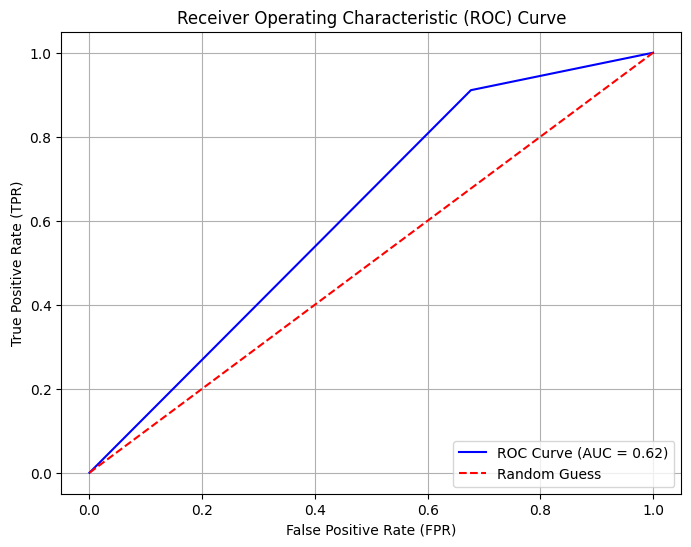

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

              precision    recall  f1-score   support

           0       0.64      0.37      0.47       340
           1       0.85      0.94      0.89      1260

    accuracy                           0.82      1600
   macro avg       0.74      0.66      0.68      1600
weighted avg       0.80      0.82      0.80      1600



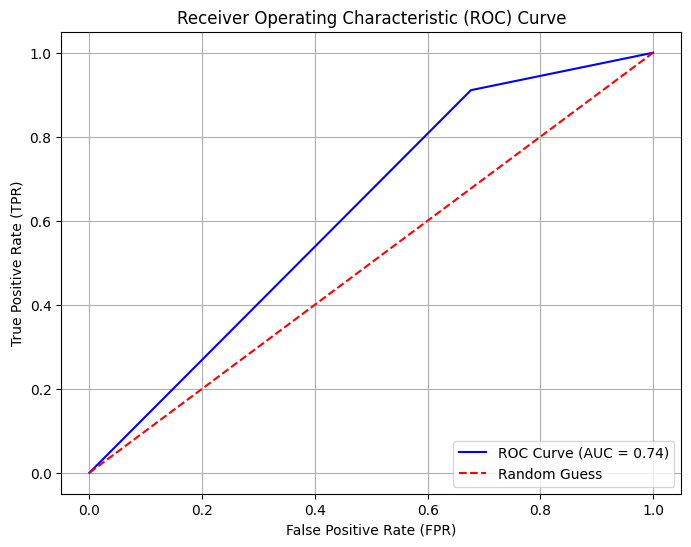

In [ ]:
balanced_bagging_classifier.fit(X_train, y_train)
# Make predictions
y_pred = balanced_bagging_classifier.predict(X_test)
print(classification_report(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(balanced_bagging_classifier, X, y, cv=stratified_kfold, scoring='roc_auc')

print(f"Stratified Cross-Validation AUC Scores: {scores}")
print(f"Mean AUC: {scores.mean():.3f}")

Stratified Cross-Validation AUC Scores: [0.80451968 0.824533   0.78475374 0.76909249 0.75731459]
Mean AUC: 0.788


## Post Pruning

In [ ]:
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)

# Prune using ccp_alpha
path = clf_full.cost_complexity_pruning_path(X_train, y_train)  # Compute alphas
ccp_alphas = path.ccp_alphas  # Get list of alphas

# Retrain the tree for different alphas and choose the best
pruned_trees = [DecisionTreeClassifier(random_state=42, ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]

Best ccp_alpha: 0.002178862063580051
Validation Accuracy: 0.87875
Test Accuracy: 0.87875
              precision    recall  f1-score   support

           0       0.06      0.60      0.11        20
           1       0.99      0.88      0.93      1580

    accuracy                           0.88      1600
   macro avg       0.53      0.74      0.52      1600
weighted avg       0.98      0.88      0.92      1600



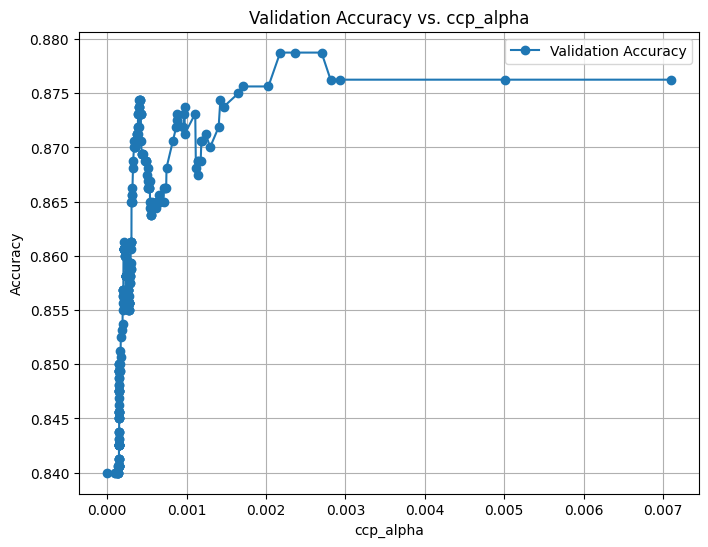

In [ ]:
validation_scores = [accuracy_score(y_test, tree.predict(X_test)) for tree in pruned_trees]

# Select the best tree (highest validation accuracy)
best_alpha_index = np.argmax(validation_scores)
best_tree = pruned_trees[best_alpha_index]

# Test the best tree
test_score = accuracy_score(y_test, best_tree.predict(X_test))

# Print results
print(f"Best ccp_alpha: {ccp_alphas[best_alpha_index]}")
print(f"Validation Accuracy: {validation_scores[best_alpha_index]}")
print(f"Test Accuracy: {test_score}")
print(classification_report(best_tree.predict(X_test), y_test))
# Plot validation accuracy vs. ccp_alpha
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, validation_scores, marker='o', label='Validation Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. ccp_alpha')
plt.legend()
plt.grid()
plt.show()